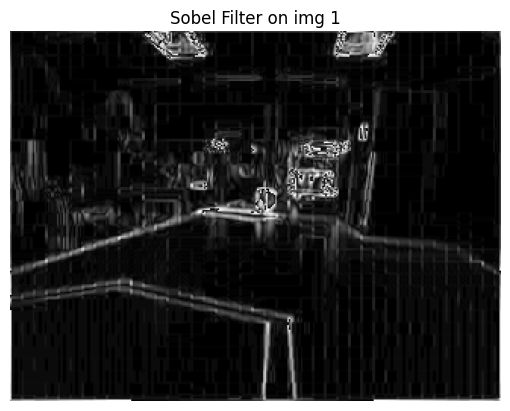

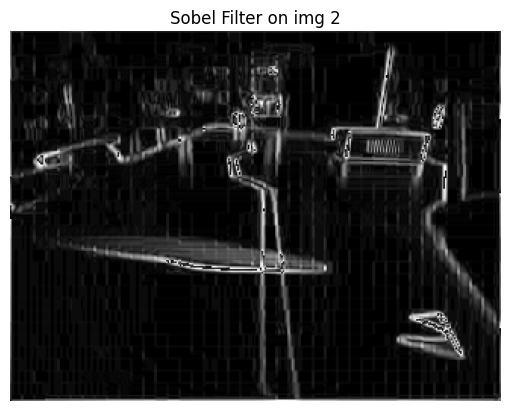

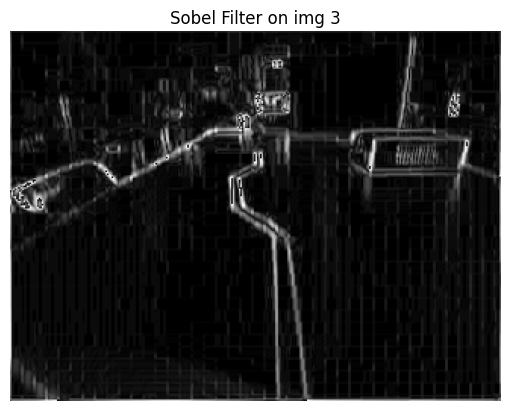

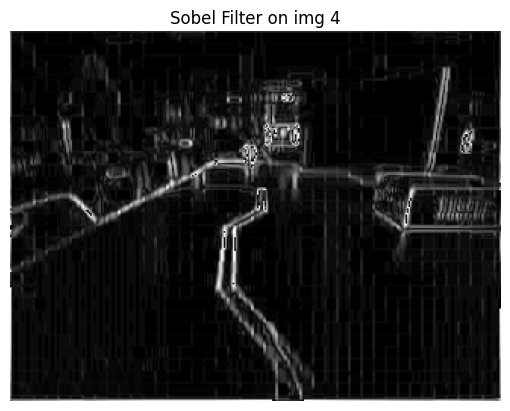

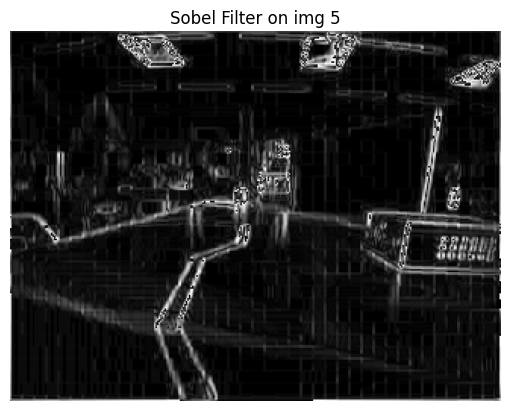

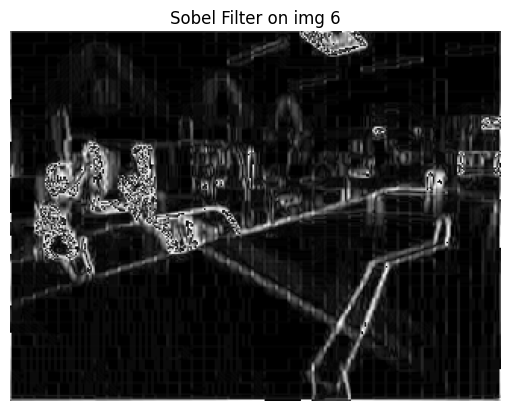

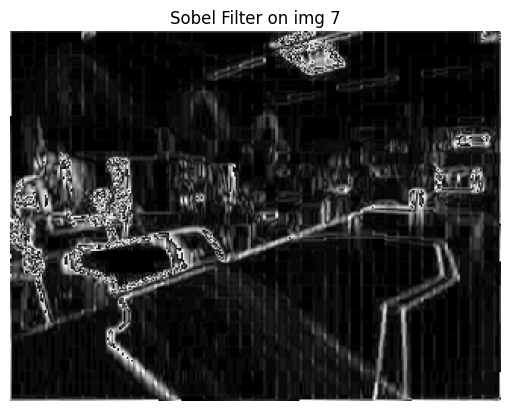

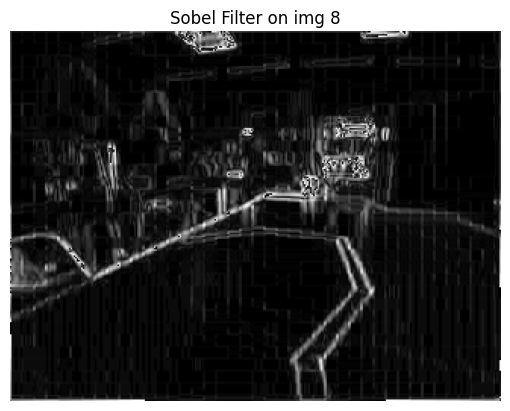

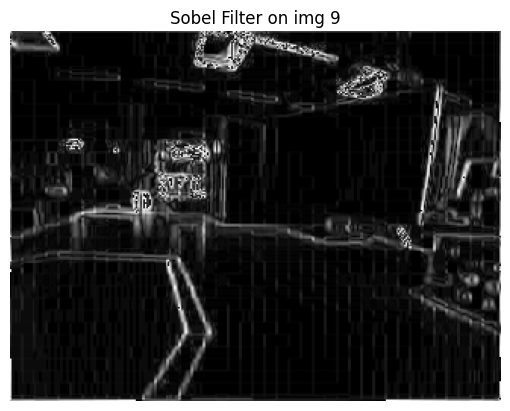

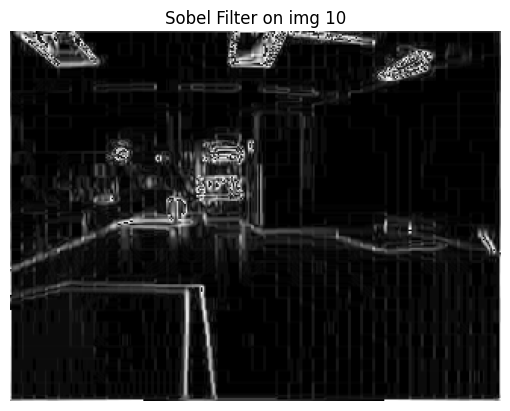

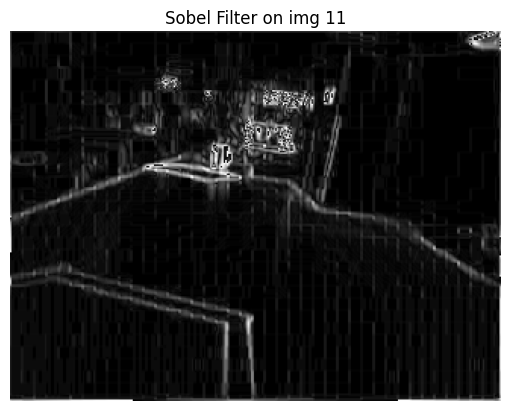

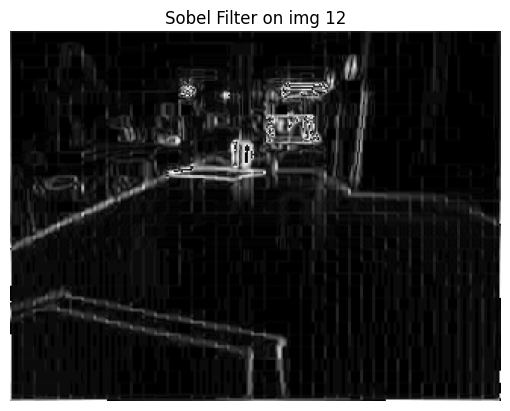

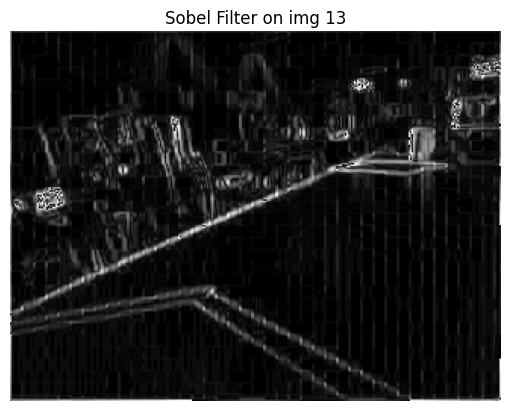

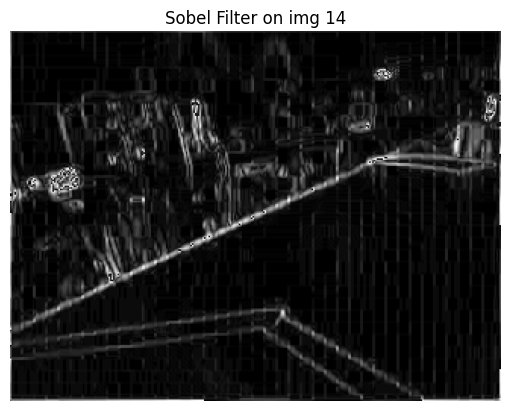

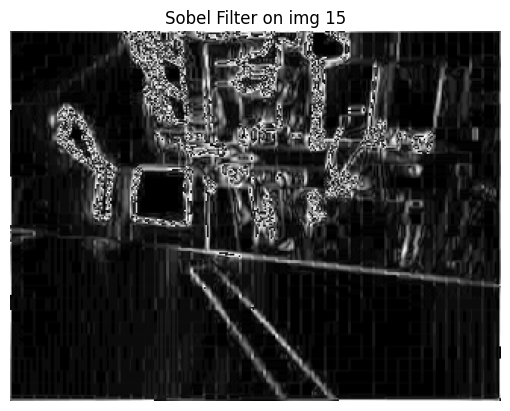

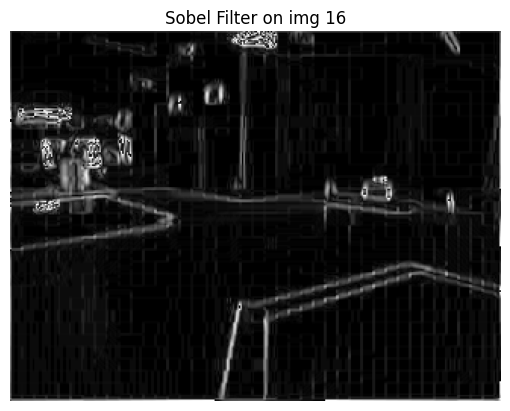

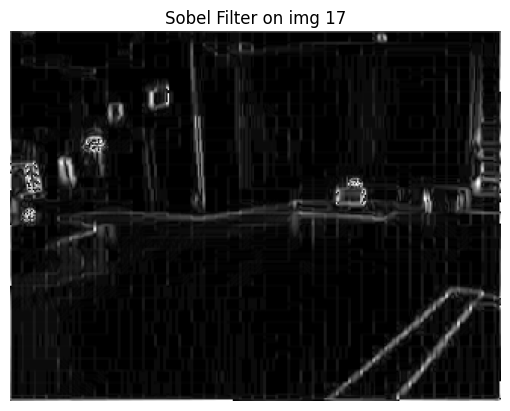

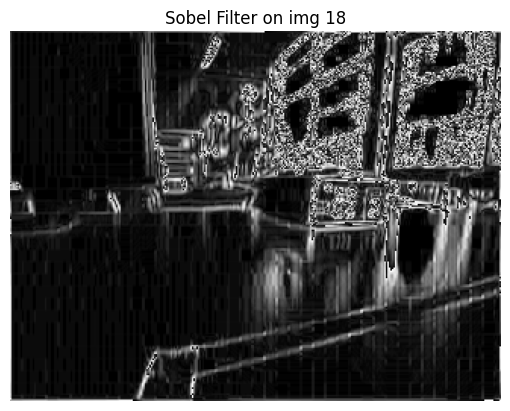

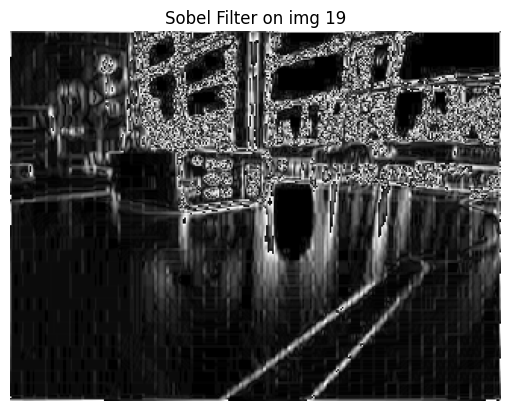

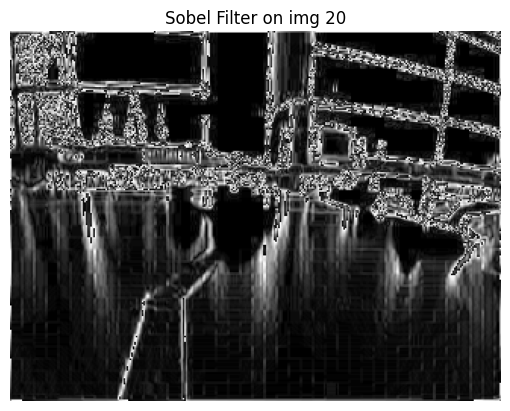

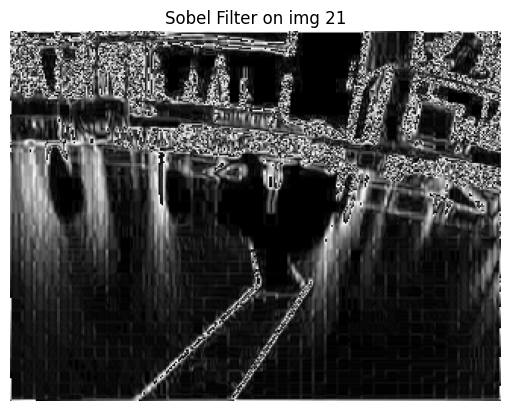

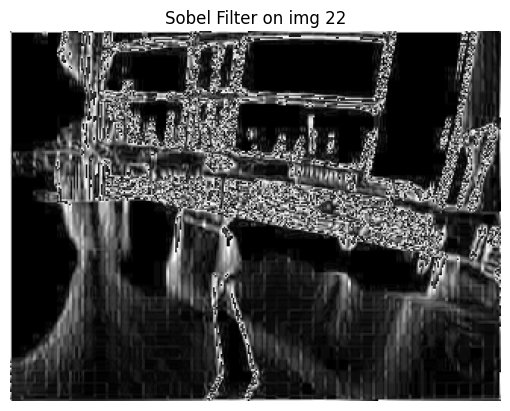

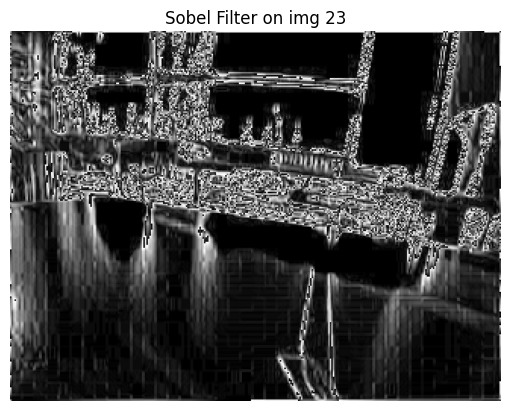

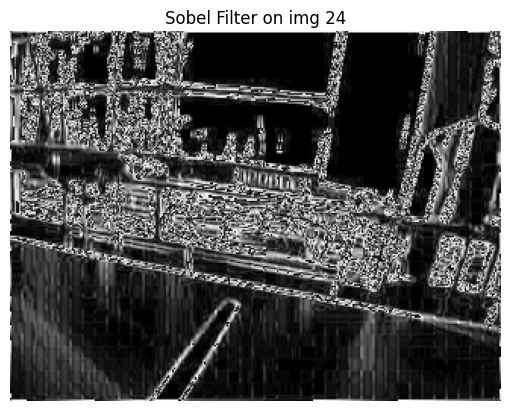

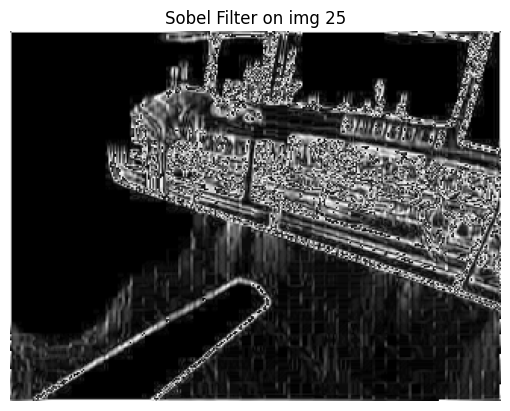

In [15]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Définir les noyaux Sobel pour les dérivées horizontales et verticales
vert_values = [3., 6.]
sobel_kernel_x = torch.tensor([[-vert_values[0], 0., vert_values[0]],
                               [-vert_values[1], 0., vert_values[1]],
                               [-vert_values[0], 0., vert_values[0]]])

horz_values = [1., 2.]
sobel_kernel_y = torch.tensor([[-horz_values[0], -horz_values[1], -horz_values[0]],
                               [0., 0., 0.],
                               [horz_values[0], horz_values[1], horz_values[0]]])

# Ces noyaux doivent être étendus pour s'adapter aux dimensions de l'image [batch_size, channels, height, width]
# [out_channels, in_channels, height, width]
sobel_kernel_x = sobel_kernel_x.view((1, 1, 3, 3))
sobel_kernel_y = sobel_kernel_y.view((1, 1, 3, 3))

# Vérifiez si CUDA est disponible et définissez le périphérique en conséquence
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir les noyaux en types de données adaptés pour les calculs de convolution
sobel_kernel_x = sobel_kernel_x.to(device, dtype=torch.float32)
sobel_kernel_y = sobel_kernel_y.to(device, dtype=torch.float32)

# Fonction pour appliquer le filtre Sobel à une image
def sobel_filter(image_path):
    # Charger l'image en utilisant Pillow et la convertir en tenseur PyTorch
    image = Image.open(image_path).convert("L")
    transform = transforms.ToTensor()
    image_tensor = transform(image).to(device)
    
    # Ajouter des dimensions de batch et de canal pour correspondre à la forme [B, C, H, W]
    image_tensor = image_tensor.unsqueeze(0)

    # Appliquer le filtre de Sobel sur l'image tensorielle
    Gx = F.conv2d(image_tensor, sobel_kernel_x, padding=1)
    Gy = F.conv2d(image_tensor, sobel_kernel_y, padding=1)

    # Calculer la magnitude du gradient
    sobel_magnitude = torch.sqrt(Gx**2 + Gy**2)
    
    # Convertir le gradient en image PIL pour l'affichage
    sobel_magnitude_image = transforms.ToPILImage()(sobel_magnitude.squeeze(0))
    
    return sobel_magnitude_image

def plot_image(image_path, i):
    sobel_image = sobel_filter(image_path)
    plt.imshow(sobel_image, cmap='gray')
    plt.title("Sobel Filter on img " + i)
    plt.axis('off')
    plt.show()

# Chemin de votre image ici
image_path = 'scotch/img1.png'

for i in range(1, 26):
    plot_image('scotch/img' + str(i) + '.png', str(i))